<div style="text-align:center;">  

# Deep Learning Projcet
# Time Series on Environmental Data

<br/>

#### Aniss BESSALAH (SIQ2) & Hatem Mohamed ABDELMOUMEN (SID)

</div>

# Packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import json
from collections import Counter

# Data preprocessing

In [2]:
# Charger le dataset
df = pd.read_csv('data.csv', sep=';')
df

,Year,Month,Day,Hour,Minute,TAir,Precip1,SM_5cm,ST_5cm,SM_10cm,ST_10cm,SM_20cm,ST_20cm,SM_50cm,ST_50cm
0,2014,5,30,12,0,16.6,0.000,0.188,19.1,0.148,18.8,0.123,18.0,0.165,17.3
1,2014,5,30,13,0,17.7,0.000,0.187,19.7,0.150,19.5,0.122,18.0,0.164,17.3
2,2014,5,30,14,0,18.9,0.000,0.187,20.7,0.150,20.3,0.126,18.4,0.165,17.3
3,2014,5,30,15,0,19.5,0.000,0.186,20.7,0.158,21.1,0.120,18.6,0.167,17.3
4,2014,5,30,16,0,20.1,0.000,0.183,20.7,0.161,21.1,0.125,19.1,0.167,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37755,2018,12,31,19,0,9.0,0.000,0.352,7.4,0.279,7.5,0.000,0.0,0.297,7.7
37756,2018,12,31,20,0,9.2,0.000,0.351,7.5,0.283,7.6,0.000,0.0,0.301,7.7
37757,2018,12,31,21,0,10.0,0.254,0.352,7.6,0.285,7.7,0.000,0.0,0.301,7.7
37758,2018,12,31,22,0,12.6,0.000,0.350,8.0,0.283,7.8,0.000,0.0,0.301,7.8


In [3]:
# Sélectionner les colonnes d'intérêt
columns_of_interest = ['TAir', 'SM_5cm', 'ST_5cm', 'SM_10cm', 'ST_10cm', 'SM_20cm', 'ST_20cm', 'SM_50cm', 'ST_50cm']
data = df[columns_of_interest]
data

,TAir,SM_5cm,ST_5cm,SM_10cm,ST_10cm,SM_20cm,ST_20cm,SM_50cm,ST_50cm
0,16.6,0.188,19.1,0.148,18.8,0.123,18.0,0.165,17.3
1,17.7,0.187,19.7,0.150,19.5,0.122,18.0,0.164,17.3
2,18.9,0.187,20.7,0.150,20.3,0.126,18.4,0.165,17.3
3,19.5,0.186,20.7,0.158,21.1,0.120,18.6,0.167,17.3
4,20.1,0.183,20.7,0.161,21.1,0.125,19.1,0.167,17.3
...,...,...,...,...,...,...,...,...,...
37755,9.0,0.352,7.4,0.279,7.5,0.000,0.0,0.297,7.7
37756,9.2,0.351,7.5,0.283,7.6,0.000,0.0,0.301,7.7
37757,10.0,0.352,7.6,0.285,7.7,0.000,0.0,0.301,7.7
37758,12.6,0.350,8.0,0.283,7.8,0.000,0.0,0.301,7.8


In [4]:
# Gestion des valeurs manquantes
data = data.dropna()
data

,TAir,SM_5cm,ST_5cm,SM_10cm,ST_10cm,SM_20cm,ST_20cm,SM_50cm,ST_50cm
0,16.6,0.188,19.1,0.148,18.8,0.123,18.0,0.165,17.3
1,17.7,0.187,19.7,0.150,19.5,0.122,18.0,0.164,17.3
2,18.9,0.187,20.7,0.150,20.3,0.126,18.4,0.165,17.3
3,19.5,0.186,20.7,0.158,21.1,0.120,18.6,0.167,17.3
4,20.1,0.183,20.7,0.161,21.1,0.125,19.1,0.167,17.3
...,...,...,...,...,...,...,...,...,...
37755,9.0,0.352,7.4,0.279,7.5,0.000,0.0,0.297,7.7
37756,9.2,0.351,7.5,0.283,7.6,0.000,0.0,0.301,7.7
37757,10.0,0.352,7.6,0.285,7.7,0.000,0.0,0.301,7.7
37758,12.6,0.350,8.0,0.283,7.8,0.000,0.0,0.301,7.8


In [5]:
# Normalisation des données
scaler = MinMaxScaler()  
data_normalized = scaler.fit_transform(data)
data_normalized

array([[0.63085938, 0.39130435, 0.51630435, ..., 0.61016949, 0.09677419,
        0.61509434],
       [0.65234375, 0.3887468 , 0.5326087 , ..., 0.61016949, 0.09032258,
        0.61509434],
       [0.67578125, 0.3887468 , 0.55978261, ..., 0.62372881, 0.09677419,
        0.61509434],
       ...,
       [0.50195312, 0.81074169, 0.20380435, ..., 0.        , 0.97419355,
        0.25283019],
       [0.55273438, 0.8056266 , 0.21467391, ..., 0.        , 0.97419355,
        0.25660377],
       [0.57617188, 0.82608696, 0.22826087, ..., 0.        , 0.97419355,
        0.25660377]])

In [6]:
# Conversion en séquences temporelles
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :-1])  # Toutes les colonnes sauf la dernière pour X
        y.append(data[i+sequence_length, -1])    # Dernière colonne pour y
    return np.array(X), np.array(y)

sequence_length = 24  # Exemple : séquences de 24 heures
X, y = create_sequences(data_normalized, sequence_length)

In [7]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape

((29394, 24, 8), (7349, 24, 8))

# Neural Architecture Search

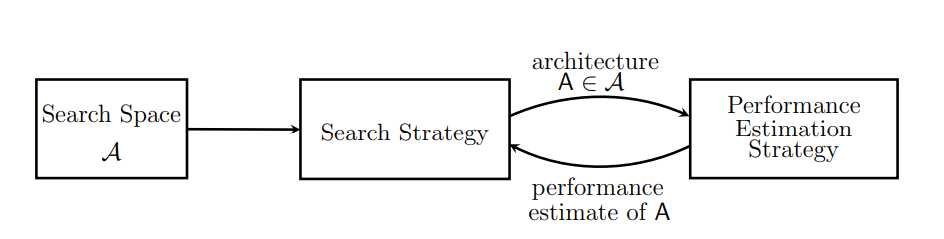

## Search Space

- **Number of layers :** [2, 3, 4, 5]
- **Layer types :** RNN, LSTM, GRU, BI-LSTM, CNN (conv1D)
- **Activation functions :** ReLu, tanh, sigmoid
- **Number of neurons :** [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [9]:
# Génération aléatoire d'hyperparamètres pour une architecture
def generate_hp(max_layers=5):
    layer_types = ["rnn", "lstm", "gru", "bi-lstm", "cnn"]
    neuron_range = range(10, 101, 10)
    activation_functions = ["tanh", "relu", "sigmoid"]
    
    num_layers = random.randint(2, max_layers - 1)  # Dense exclue
    layers = []
    for _ in range(num_layers):
        layer_type = random.choice(layer_types)
        neurons = random.choice(neuron_range)
        activation = random.choice(activation_functions)
        layers.append({"type": layer_type, "neurons": neurons, "activation": activation})
    
    return {"layers": layers}

$$
\text{number\_of\_architectures} = (5^4 + 5^3 + 5^2 + 5) \cdot 10 \cdot 3 = 23400 \text{ architectures}
$$


In [10]:
# Fonction pour créer un modèle basé sur les hyperparamètres (hp)
def create_model(hp):
    model = Sequential()
    model.add(layers.Input(shape=(X_train.shape[1], X_train.shape[2])))
    
    for i, layer_spec in enumerate(hp["layers"]):
        layer_type = layer_spec["type"]
        neurons = layer_spec["neurons"]
        activation = layer_spec["activation"]
        return_seq = True if i < len(hp["layers"]) - 1 else False
        
        if layer_type == "rnn":
            model.add(layers.SimpleRNN(neurons, activation=activation, return_sequences=return_seq))
        elif layer_type == "lstm":
            model.add(layers.LSTM(neurons, activation=activation, return_sequences=return_seq))
        elif layer_type == "gru":
            model.add(layers.GRU(neurons, activation=activation, return_sequences=return_seq))
        elif layer_type == "bi-lstm":
            model.add(layers.Bidirectional(layers.LSTM(neurons, activation=activation, return_sequences=return_seq)))
        elif layer_type == "cnn":
            model.add(layers.Conv1D(filters=neurons, kernel_size=3, activation=activation, padding="same"))

    model.add(layers.Dense(1))
    return model

## Performance Estimation Strategy

- **Subset:** Train on a subset of the data for quick evaluation.  
- **Early stopping:** Stop training when progress stagnates.

In [11]:
# Fonction pour évaluer un modèle avec différentes stratégies
def evaluate_model(hp, X_train, y_train, X_val=None, y_val=None, strategy="subset", subset_ratio=0.1, epochs=10, batch_size=32, patience=2):
    model = create_model(hp)
    model.compile(optimizer="adam", loss="mse")
    
    if strategy == "subset":
        # Utiliser une partie des données pour une évaluation rapide
        subset_size = int(len(X_train) * subset_ratio)
        X_subset, y_subset = X_train[:subset_size], y_train[:subset_size]
        history = model.fit(
            X_subset, y_subset,
            validation_data=(X_val, y_val),
            epochs=epochs, batch_size=batch_size, verbose=0
        )
        loss = history.history['val_loss'][-1] if X_val is not None else history.history['loss'][-1]
    
    elif strategy == "partial_train":
        # Entraînement partiel avec Early Stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs, batch_size=batch_size,
            callbacks=[early_stopping], verbose=0
        )
        loss = history.history['val_loss'][-1] if X_val is not None else history.history['loss'][-1]
    
    else:
        raise ValueError("Stratégie d'évaluation inconnue : choisissez 'subset' ou 'partial_train'.")
    
    return loss

In [12]:
# Wrapper function avec sauvegarde et récupération
def evaluate_architecture(hp, cache_file="architecture_scores.csv"):
    # Convertir l'architecture en une chaîne JSON ordonnée pour un hashing unique
    hp_str = json.dumps(hp, sort_keys=True)
    
    # Charger le cache des évaluations
    if os.path.exists(cache_file):
        cache = pd.read_csv(cache_file)
    else:
        cache = pd.DataFrame(columns=["architecture", "score"])
    
    # Vérifier si l'architecture a déjà été évaluée
    if hp_str in cache["architecture"].values:
        score = cache.loc[cache["architecture"] == hp_str, "score"].iloc[0]
        print(f"Architecture déjà évaluée. Score récupéré : {score}")
    else:
        # Si non évaluée, évaluer et sauvegarder
        score = evaluate_model(hp, X_train, y_train, X_test, y_test, strategy="subset", subset_ratio=0.1, epochs=5)
        new_entry = pd.DataFrame({"architecture": [hp_str], "score": [score]})
        cache = pd.concat([cache, new_entry], ignore_index=True)
        cache.to_csv(cache_file, index=False)
        print(f"Nouvelle architecture évaluée. Score : {score}")
    
    return score

## Search Strategy

- **Evolutionnary Algorithm: Genetic Algorithm :**

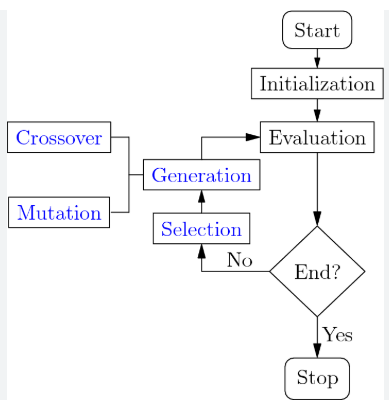

### Initialization

In [13]:
# Initialiser une population d'architectures aléatoires
def init_population(pop_size, max_layers=5):
    population = []

    # Ajouter des architectures simples à la population
    basic_architectures = [
        {"layers": [{"type": "rnn", "neurons": 50, "activation": "tanh"}]},
        {"layers": [{"type": "lstm", "neurons": 50, "activation": "tanh"}]},
        {"layers": [{"type": "gru", "neurons": 50, "activation": "tanh"}]},
        {"layers": [{"type": "bi-lstm", "neurons": 50, "activation": "tanh"}]},
        {"layers": [{"type": "cnn", "neurons": 50, "activation": "tanh"}]},
    ]
    population.extend(basic_architectures)  # Ajouter les architectures simples à la population

    for _ in range(pop_size):
        hp = generate_hp(max_layers)  # Générer une architecture aléatoire
        population.append(hp)
    return population

### Crossover

In [14]:
# Crossover : Combiner deux architectures
def crossover(parent1, parent2):
    
    parent1_layers = parent1["layers"]
    parent2_layers = parent2["layers"]
    
    # Cas où un des parents n'a qu'une seule couche
    if len(parent1_layers) == 1 and len(parent2_layers) == 1:
        child_layers = [parent1_layers[0]] + [parent2_layers[0]]
    elif len(parent1_layers) == 1:
        child_layers = [parent1_layers[0]] + parent2_layers[1:]
    elif len(parent2_layers) == 1:
        child_layers = [parent2_layers[0]] + parent1_layers[1:]
    else:
        # Cas général, croisement entre deux parents avec plus d'une couche
        crossover_point = random.randint(1, min(len(parent1_layers), len(parent2_layers)) - 1)
        child_layers = parent1_layers[:crossover_point] + parent2_layers[crossover_point:]

    # Création de l'enfant
    child = {"layers": child_layers}
    return child

### Mutation

In [15]:
# Mutation : Modifier aléatoirement un type de couche ou une fonction d'activation
def mutate_architecture(hp):
    mutated_hp = hp.copy()
    layer_to_mutate = random.choice(mutated_hp["layers"])
    mutation_type = random.choice(["layer", "activation"])
    
    if mutation_type == "layer":
        current_type = layer_to_mutate["type"]
        possible_types = ["rnn", "lstm", "gru", "bi-lstm", "cnn"]
        possible_types.remove(current_type)  # Retirer le type actuel pour garantir un changement
        layer_to_mutate["type"] = random.choice(possible_types)
    elif mutation_type == "activation":
        current_activation = layer_to_mutate["activation"]
        possible_activations = ["tanh", "relu", "sigmoid"]
        possible_activations.remove(current_activation)  # Retirer l'activation actuelle
        layer_to_mutate["activation"] = random.choice(possible_activations)
    
    return mutated_hp

### Replacement

In [16]:
# Mise à jour de la population
def replacement(population, children, pop_size=10):
    combined_population = population + children
    seen = set()
    unique_population = []
    for arch, score in combined_population:
        arch_repr = json.dumps(arch, sort_keys=True)
        if arch_repr not in seen:
            unique_population.append((arch, score))
            seen.add(arch_repr)
    unique_population.sort(key=lambda x: x[1])
    return unique_population[:pop_size]

### Evolutionnary Algorithm

In [27]:
# Algorithme évolutionnaire
def evolutionary_algorithm(pop_size=10, generations=10, crossover_rate=0.7, mutation_rate=0.3, top_n=5):
    
    # Initialisation de la population
    print("======= Generation 0 : Intitialization =======")
    population = [(hp, evaluate_architecture(hp)) for hp in init_population(pop_size)]
    performance_history = []
    best_architectures_all_gen = {}

    # Meilleur architecture initiale
    population.sort(key=lambda x: x[1])
    performance_history = [population[0][1]]

    for gen in range(generations):
        print(f"======= Generation {gen + 1} =======")
        print(f"population={population}")
        
        # Meilleures architectures de la génération
        population.sort(key=lambda x: x[1])
        top_architectures = population[:top_n]
        
        # Mise à jour des meilleures architectures cumulées
        for hp, score in top_architectures:
            arch_repr = json.dumps(hp, sort_keys=True)
            if arch_repr not in best_architectures_all_gen:
                best_architectures_all_gen[arch_repr] = score
        
        # Générer les enfants
        children = []
        seen_architectures = set(json.dumps(hp, sort_keys=True) for hp, _ in population)
        while len(children) < pop_size - top_n:
            # Sélection aléatoire de deux parents
            parent1, _ = random.choice(top_architectures)
            parent2, _ = random.choice(top_architectures)
            child = parent1.copy()

            # Crossover
            if parent1 != parent2 and random.random() < crossover_rate:
                child = crossover(parent1, parent2)
                print("Crossover applied")
            
            # Mutation
            if random.random() < mutation_rate:
                child = mutate_architecture(child)
                print("Mutation applied")
            
            # Évaluation et ajout des enfants non dupliqués
            child_repr = json.dumps(child, sort_keys=True)
            if child_repr not in seen_architectures:
                child_score = evaluate_architecture(child)
                children.append((child, child_score))
                seen_architectures.add(child_repr)
            else:
                print("Duplicate detected; generating a new child.")

        # Suivre la meilleure architecture de la génération actuelle
        children.sort(key=lambda x: x[1])
        best_hp_gen, best_loss_gen = children[0]
        performance_history.append(best_loss_gen)
        print(f"  Best loss of generation {gen + 1}: {best_loss_gen}")
        print()
        
        # Mise à jour de la population
        population = replacement(population, children, pop_size)

    # Ajout de la dernière génération
    for hp, score in population[:top_n]:
        arch_repr = json.dumps(hp, sort_keys=True)
        if arch_repr not in best_architectures_all_gen:
            best_architectures_all_gen[arch_repr] = score

    # Préparer le retour des meilleures architectures
    best_architectures_all_gen = [(json.loads(arch_repr), score) for arch_repr, score in best_architectures_all_gen.items()]
    best_architectures_all_gen.sort(key=lambda x: x[1])

    return best_architectures_all_gen, performance_history

## Display and Save functions

### Display

In [18]:
# Fonction pour afficher les architectures dans une table avec leurs scores
def display_architectures_table(top_architectures):
    
    data = []
    
    for arch, score in top_architectures:
        layers_info = []        
        for layer in arch["layers"]:
            layer_type = layer.get("type", "-")
            neurons = layer.get("neurons", "-")
            activation = layer.get("activation", "-")
            layers_info.append(f"{layer_type}({neurons}, {activation})")
        
        # Ajouter '-' pour les colonnes manquantes, afin d'harmoniser le tableau
        while len(layers_info) < 4:
            layers_info.append('-')

        # Ajouter les couches et le score à la table
        data.append(layers_info + [score])
    
    # Créer un DataFrame avec les données
    columns = ["Layer 1", "Layer 2", "Layer 3", "Layer 4", "Score"]
    df = pd.DataFrame(data, columns=columns)
    
    return df

In [19]:
# Fonction pour afficher le résumé des meilleures architectures
def summarize_top_architectures(top_architectures):
    for i, (arch, score) in enumerate(top_architectures, 1):
        print(f"\n=== Architecture {i} ===")
        print(f"Score (Loss): {score}")
        model = create_model(arch)
        model.summary()
        print()

In [20]:
# Fonction pour tracer l'évolution des performances
def plot_performance(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history, marker='o', label='Best Loss per Generation')
    plt.title('Evolutionary Algorithm Performance Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()

In [21]:
# Fonction pour tracer les statistiques des meilleures architectures
def plot_stats(best_architectures):

    neurons = []
    layer_types = []
    activation_functions = []

    for architecture, _ in best_architectures:
        for layer in architecture['layers']:
            neurons.append(layer.get('neurons', 'None'))
            layer_types.append(layer.get('type', 'Unknown'))
            activation_functions.append(layer.get('activation', 'None'))

    neuron_counts = Counter(neurons)
    layer_counts = Counter(layer_types)
    activation_counts = Counter(activation_functions)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Distribution des neurones
    axs[0].bar(neuron_counts.keys(), neuron_counts.values(), color='skyblue')
    axs[0].set_title('Distribution of Number of Neurons')
    axs[0].set_xlabel('Number of Neurons')
    axs[0].set_ylabel('Frequency')

    # Distribution des types de couches
    axs[1].bar(layer_counts.keys(), layer_counts.values(), color='lightgreen')
    axs[1].set_title('Distribution of Layer Types')
    axs[1].set_xlabel('Layer Type')
    axs[1].set_ylabel('Frequency')

    # Distribution des fonctions d'activation
    axs[2].bar(activation_counts.keys(), activation_counts.values(), color='salmon')
    axs[2].set_title('Distribution of Activation Functions')
    axs[2].set_xlabel('Activation Function')
    axs[2].set_ylabel('Frequency')

    # Ajuster la mise en page
    plt.tight_layout()
    plt.show()

### Save

In [33]:
# Fonction pour sauvegarder les meilleures architectures
def save_best_architectures(best_architectures_all_gen, filename="best_architectures.json"):
    with open(filename, 'w') as f:
        # Convertir chaque architecture en dictionnaire (si nécessaire) et sauvegarder
        architectures_to_save = [
            {"architecture": arch, "score": score} for arch, score in best_architectures_all_gen
        ]
        json.dump(architectures_to_save, f, indent=4)
    print(f"Best architectures saved to {filename}")

In [34]:
# Fonction pour charger les meilleures architectures
def load_best_architectures(filename="best_architectures.json"):

    with open(filename, 'r') as f:
        architectures_loaded = json.load(f)
        best_architectures_all_gen = [
            (arch_data["architecture"], arch_data["score"]) for arch_data in architectures_loaded
        ]
    print(f"Best architectures loaded from {filename}")
    return best_architectures_all_gen

# Results

### Globally

In [29]:
# Exécuter l'algorithme évolutionnaire avec suivi
best_architectures, performance_history = evolutionary_algorithm(pop_size=10, generations=10, crossover_rate=0.7, mutation_rate=0.3, top_n=5)

======= Generation 0 : Intitialization =======


C:\Users\admin\AppData\Local\Temp\ipykernel_5384\3199549117.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cache = pd.concat([cache, new_entry], ignore_index=True)


Nouvelle architecture évaluée. Score : 0.0018882772419601679
Nouvelle architecture évaluée. Score : 0.0007467058603651822
Nouvelle architecture évaluée. Score : 0.0009347047307528555
Nouvelle architecture évaluée. Score : 0.0007241527200676501
Nouvelle architecture évaluée. Score : 0.0767270103096962
Nouvelle architecture évaluée. Score : 0.0026407998520880938
Nouvelle architecture évaluée. Score : 0.0008180716540664434
Nouvelle architecture évaluée. Score : 0.030468998476862907
Nouvelle architecture évaluée. Score : 0.003673909232020378
Nouvelle architecture évaluée. Score : 0.07662053406238556
Nouvelle architecture évaluée. Score : 0.00321428501047194
Nouvelle architecture évaluée. Score : 0.00062649353640154
Nouvelle architecture évaluée. Score : 0.0004430300323292613
Nouvelle architecture évaluée. Score : 0.0023584419395774603
Nouvelle architecture évaluée. Score : 0.07784932106733322
======= Generation 1 =======
population=[({'layers': [{'type': 'lstm', 'neurons': 90, 'activation'

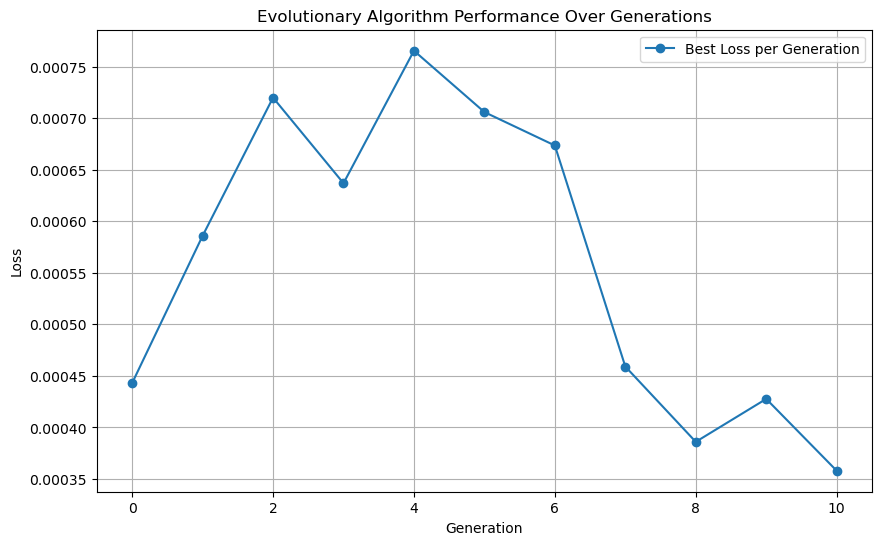

In [30]:
plot_performance(performance_history)

In [35]:
save_best_architectures(best_architectures)

Best architectures saved to best_architectures.json


### Best architectures

In [31]:
len(best_architectures)

46

In [32]:
best_architectures

[({'layers': [{'activation': 'relu', 'neurons': 90, 'type': 'lstm'},
    {'activation': 'relu', 'neurons': 20, 'type': 'rnn'},
    {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
  0.0004430300323292613),
 ({'layers': [{'activation': 'relu', 'neurons': 90, 'type': 'lstm'},
    {'activation': 'tanh', 'neurons': 20, 'type': 'rnn'},
    {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
  0.0004430300323292613),
 ({'layers': [{'activation': 'tanh', 'neurons': 90, 'type': 'lstm'},
    {'activation': 'tanh', 'neurons': 20, 'type': 'rnn'},
    {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
  0.0004430300323292613),
 ({'layers': [{'activation': 'sigmoid', 'neurons': 90, 'type': 'lstm'},
    {'activation': 'tanh', 'neurons': 20, 'type': 'rnn'},
    {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
  0.0004430300323292613),
 ({'layers': [{'activation': 'tanh', 'neurons': 90, 'type': 'gru'},
    {'activation': 'tanh', 'neurons': 20, 'type': 'gru'},
    {'activation': 

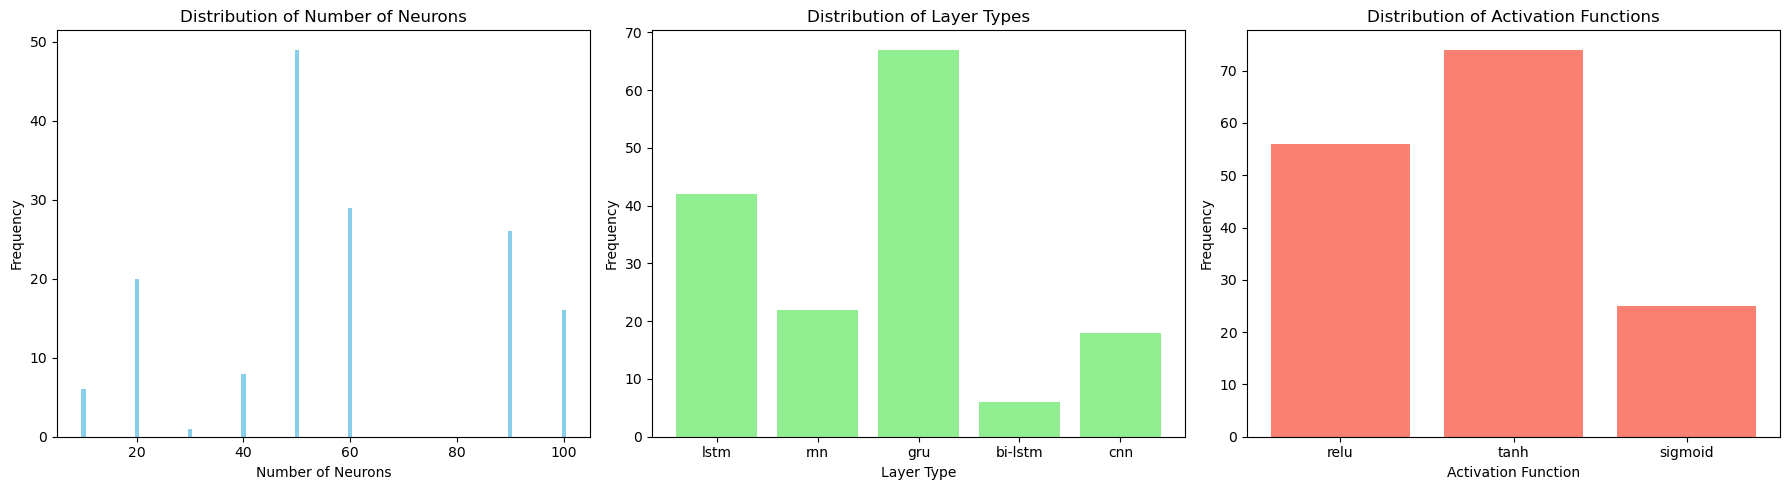

In [39]:
plot_stats(best_architectures)

### Top 5 architectures

In [40]:
top_architectures = best_architectures[:5]
top_architectures

[({'layers': [{'activation': 'relu', 'neurons': 90, 'type': 'lstm'},
    {'activation': 'relu', 'neurons': 20, 'type': 'rnn'},
    {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
  0.0004430300323292613),
 ({'layers': [{'activation': 'relu', 'neurons': 90, 'type': 'lstm'},
    {'activation': 'tanh', 'neurons': 20, 'type': 'rnn'},
    {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
  0.0004430300323292613),
 ({'layers': [{'activation': 'tanh', 'neurons': 90, 'type': 'lstm'},
    {'activation': 'tanh', 'neurons': 20, 'type': 'rnn'},
    {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
  0.0004430300323292613),
 ({'layers': [{'activation': 'sigmoid', 'neurons': 90, 'type': 'lstm'},
    {'activation': 'tanh', 'neurons': 20, 'type': 'rnn'},
    {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
  0.0004430300323292613),
 ({'layers': [{'activation': 'tanh', 'neurons': 90, 'type': 'gru'},
    {'activation': 'tanh', 'neurons': 20, 'type': 'gru'},
    {'activation': 

In [41]:
display_architectures_table(top_architectures)

,Layer 1,Layer 2,Layer 3,Layer 4,Score
0,"lstm(90, relu)","rnn(20, relu)","gru(40, relu)",-,0.000443
1,"lstm(90, relu)","rnn(20, tanh)","gru(40, relu)",-,0.000443
2,"lstm(90, tanh)","rnn(20, tanh)","gru(40, relu)",-,0.000443
3,"lstm(90, sigmoid)","rnn(20, tanh)","gru(40, relu)",-,0.000443
4,"gru(90, tanh)","gru(20, tanh)","gru(40, relu)",-,0.000443


In [42]:
summarize_top_architectures(top_architectures)


=== Architecture 1 ===
Score (Loss): 0.0004430300323292613


Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_140 (LSTM)                 │ (None, 24, 90)         │        35,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_53 (SimpleRNN)       │ (None, 24, 20)         │         2,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_104 (GRU)                   │ (None, 40)             │         7,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,341 (177.11 KB)

 Trainable params: 45,341 (177.11 KB)

 Non-trainable params: 0 (0.00 B)



=== Architecture 2 ===
Score (Loss): 0.0004430300323292613


Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_141 (LSTM)                 │ (None, 24, 90)         │        35,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_54 (SimpleRNN)       │ (None, 24, 20)         │         2,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_105 (GRU)                   │ (None, 40)             │         7,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,341 (177.11 KB)

 Trainable params: 45,341 (177.11 KB)

 Non-trainable params: 0 (0.00 B)



=== Architecture 3 ===
Score (Loss): 0.0004430300323292613


Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_142 (LSTM)                 │ (None, 24, 90)         │        35,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_55 (SimpleRNN)       │ (None, 24, 20)         │         2,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_106 (GRU)                   │ (None, 40)             │         7,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,341 (177.11 KB)

 Trainable params: 45,341 (177.11 KB)

 Non-trainable params: 0 (0.00 B)



=== Architecture 4 ===
Score (Loss): 0.0004430300323292613


Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_143 (LSTM)                 │ (None, 24, 90)         │        35,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_56 (SimpleRNN)       │ (None, 24, 20)         │         2,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_107 (GRU)                   │ (None, 40)             │         7,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,341 (177.11 KB)

 Trainable params: 45,341 (177.11 KB)

 Non-trainable params: 0 (0.00 B)



=== Architecture 5 ===
Score (Loss): 0.0004430300323292613


Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_108 (GRU)                   │ (None, 24, 90)         │        27,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_109 (GRU)                   │ (None, 24, 20)         │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_110 (GRU)                   │ (None, 40)             │         7,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,201 (160.94 KB)

 Trainable params: 41,201 (160.94 KB)

 Non-trainable params: 0 (0.00 B)

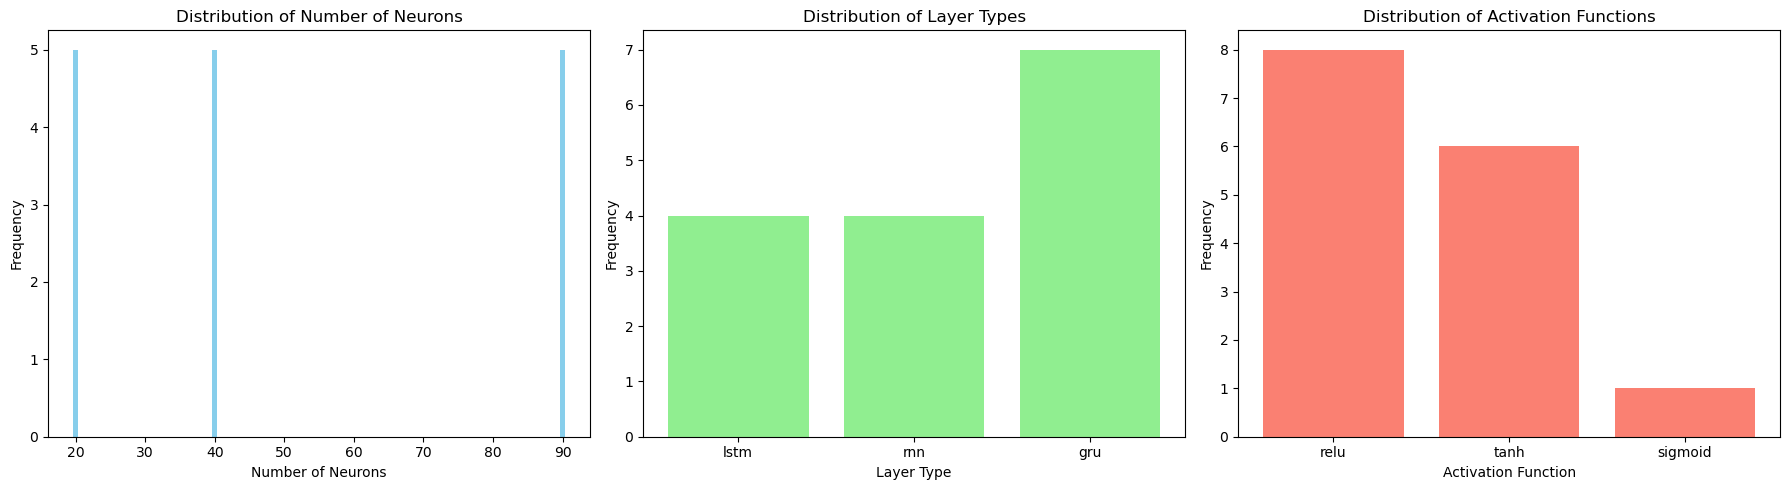

In [43]:
plot_stats(top_architectures)

### Top architecture

In [44]:
best_architecture = best_architectures[0]
best_architecture

({'layers': [{'activation': 'relu', 'neurons': 90, 'type': 'lstm'},
   {'activation': 'relu', 'neurons': 20, 'type': 'rnn'},
   {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
 0.0004430300323292613)

In [46]:
display_architectures_table([best_architecture])

,Layer 1,Layer 2,Layer 3,Layer 4,Score
0,"lstm(90, relu)","rnn(20, relu)","gru(40, relu)",-,0.000443


In [48]:
summarize_top_architectures([best_architecture])


=== Architecture 1 ===
Score (Loss): 0.0004430300323292613


Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_144 (LSTM)                 │ (None, 24, 90)         │        35,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_57 (SimpleRNN)       │ (None, 24, 20)         │         2,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_111 (GRU)                   │ (None, 40)             │         7,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,341 (177.11 KB)

 Trainable params: 45,341 (177.11 KB)

 Non-trainable params: 0 (0.00 B)

# Real performance

## Training

In [49]:
# Fonction pour entrainer et évaluer une architecture
def train_and_evaluate_architecture(hp, X_train, y_train, X_test, y_test, epochs=20, batch_size=32):

    model = create_model(hp)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Obtenir les prédictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Récupérer la perte finale
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]

    # Résultats consolidés
    results = {
        'history': history.history,
        'train_predictions': train_predictions,
        'test_predictions': test_predictions,
        'train_loss': train_loss,
        'val_loss': val_loss
    }
    
    return results

## Save results

In [62]:
# Fonction pour sauvegarder les architectures et leurs résultats
def save_architectures_results(architectures_results, file_path='architectures_results.json'):

    architectures_to_save = []
    for architecture, results in architectures_results:
        architecture_dict = {
            'architecture': architecture,
            'train_predictions': results['train_predictions'].tolist(),
            'test_predictions': results['test_predictions'].tolist(),
            'train_loss': results['train_loss'],
            'val_loss': results['val_loss'],
        }
        architectures_to_save.append(architecture_dict)

    with open(file_path, 'w') as f:
        json.dump(architectures_to_save, f, indent=4)

    print(f"Architectures results saved to {file_path}")

In [63]:
# Fonction pour charger les architectures et leurs résultats
def load_architectures_results(file_path='architectures_results.json'):

    with open(file_path, 'r') as f:
        architectures_to_load = json.load(f)

    architectures_results = []
    for architecture_dict in architectures_to_load:
        architecture = architecture_dict['architecture']  # Architecture
        results = {
            'train_predictions': np.array(architecture_dict['train_predictions']),
            'test_predictions': np.array(architecture_dict['test_predictions']),
            'train_loss': architecture_dict['train_loss'],
            'val_loss': architecture_dict['val_loss']
        }
        architectures_results.append((architecture, results))

    print(f"Architectures results loaded from {file_path}")
    return architectures_results

## Display and plot

In [60]:
# Fonction pour tracer les prédictions vs les vraies valeurs
def plot_predictions_vs_true_values(architectures_results, y_train, y_test):

    num_architectures = len(architectures_results)
    fig, axs = plt.subplots(num_architectures // 2 + num_architectures % 2, 2, figsize=(14, 5 * (num_architectures // 2 + num_architectures % 2)))

    axs = axs.flatten()

    for i, (architecture, results) in enumerate(architectures_results):
        train_predictions = results['train_predictions'][:, 0]  # Dernière valeur de chaque séquence
        test_predictions = results['test_predictions'][:, 0]

        # Tracer les vraies valeurs et les prédictions
        axs[i].plot(np.arange(len(y_train)), y_train, label="True Values Train", color="blue", alpha=0.7)
        axs[i].plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label="True Values Test", color="green", alpha=0.7)
        axs[i].plot(np.arange(len(train_predictions)), train_predictions, label="Predictions Train", color="red", alpha=0.7)
        axs[i].plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, label="Predictions Test", color="orange", alpha=0.7)
        axs[i].axvline(x=len(y_train), c="r", linestyle="--", label="Train/Test Split")

        # Configuration
        axs[i].set_title(f'Architecture {i + 1}')
        axs[i].legend()
        axs[i].grid(True)
        axs[i].set_xlabel('Time Steps')
        axs[i].set_ylabel('Values')

    # Suppression des subplots inutilisés
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

In [74]:
def plot_train_loss(architectures_results):
    """
    Trace la perte d'entraînement (train_loss) pour plusieurs architectures dans un même graphique.

    Args:
    - architectures_results (list): Liste des tuples (architecture, results).
    """
    plt.figure(figsize=(10, 6))

    # Pour chaque architecture, ajouter la courbe de train_loss
    for i, (architecture, results) in enumerate(architectures_results):
        history = results['history']
        plt.plot(history['loss'], label=f'Architecture {i + 1}')
    
    # Configuration du graphique
    plt.title('Loss for Top Architectures')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Fonction pour comparer NAS et valeurs reelles
def display_architecture_comparison(top_architectures, architectures_results):

    architecture_names = []
    estimated_losses = []
    real_losses = []
    errors = []

    # Parcourir top_architectures et architectures_results pour récupérer les informations
    for i, (arch, results) in enumerate(architectures_results):
        # Nom de l'architecture
        architecture_names.append(f"Architecture_{i+1}")

        # Estimated loss (score dans top_architectures)
        estimated_loss = top_architectures[i][1]  # Accès au score via [1]
        estimated_losses.append(estimated_loss)

        # Real loss (val_loss dans results)
        real_loss = results['val_loss']
        real_losses.append(real_loss)

        # Calcul de l'erreur (différence entre Estimated Loss et Real Loss)
        error = estimated_loss - real_loss
        errors.append(error)

    # Créer un DataFrame
    df = pd.DataFrame({
        'Architecture': architecture_names,
        'Estimated Loss': estimated_losses,
        'Real Loss': real_losses,
        'Error': errors
    })

    # Appliquer le formatage pour les float (affichage complet sans arrondi)
    df['Estimated Loss'] = df['Estimated Loss'].apply(lambda x: f"{x:.6f}")
    df['Real Loss'] = df['Real Loss'].apply(lambda x: f"{x:.6f}")
    df['Error'] = df['Error'].apply(lambda x: f"{x:.6f}")

    return df

## Results

In [57]:
architectures_results = []
for i , (hp, score) in enumerate(top_architectures):
    print(f"====== Training Architecture {i + 1} ======")
    results = train_and_evaluate_architecture(hp, X_train, y_train, X_test, y_test, epochs=10, batch_size=32)
    architectures_results.append((hp, results))
    print(f"     Architecture {i + 1} finished training")
    print()

====== Training Architecture 1 ======
Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - loss: 0.0148 - mae: 0.0547 - val_loss: 4.4529e-04 - val_mae: 0.0165
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 4.4822e-04 - mae: 0.0164 - val_loss: 3.5190e-04 - val_mae: 0.0147
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - loss: 3.0640e-04 - mae: 0.0137 - val_loss: 3.1064e-04 - val_mae: 0.0143
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 3.0060e-04 - mae: 0.0133 - val_loss: 2.2377e-04 - val_mae: 0.0116
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 2.1784e-04 - mae: 0.0113 - val_loss: 3.9659e-04 - val_mae: 0.0169
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 2.0301e-04 - mae: 0.0109 - val_loss: 1.4710e-04 - val_mae: 0.0094
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 1.8477e-04 - mae: 0.0103 - val_loss: 1.0341e-04 - val_mae: 0.0078
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - loss: 1.6840e-

In [64]:
save_architectures_results(architectures_results)

Architectures results saved to architectures_results.json


In [59]:
architectures_results

[({'layers': [{'activation': 'relu', 'neurons': 90, 'type': 'lstm'},
    {'activation': 'relu', 'neurons': 20, 'type': 'rnn'},
    {'activation': 'relu', 'neurons': 40, 'type': 'gru'}]},
  {'history': {'loss': [0.0032706137280911207,
     0.0004121473466511816,
     0.00029641814762726426,
     0.00027910221251659095,
     0.0002319939958397299,
     0.0002137850533472374,
     0.00019780878210440278,
     0.00016595039051026106,
     0.0001516820047982037,
     0.00014459928206633776],
    'mae': [0.026881543919444084,
     0.015752892941236496,
     0.013376439921557903,
     0.01281779259443283,
     0.011617235839366913,
     0.011132568120956421,
     0.010603677481412888,
     0.00979448389261961,
     0.009167317301034927,
     0.009075529873371124],
    'val_loss': [0.0004452854045666754,
     0.00035189991467632353,
     0.00031063996721059084,
     0.00022377436107490212,
     0.000396585906855762,
     0.00014710304094478488,
     0.00010340812150388956,
     0.0001094756153

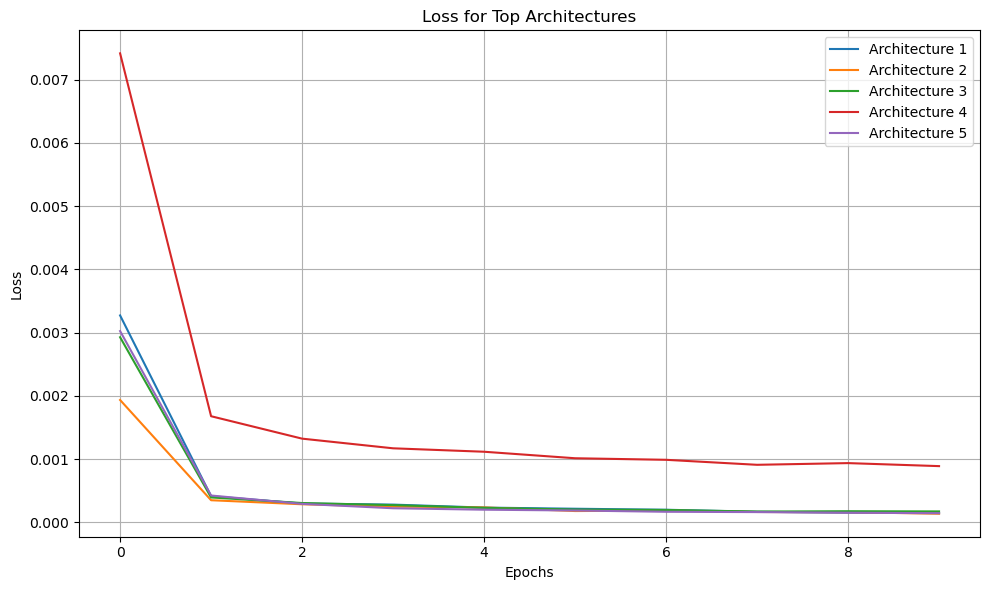

In [75]:
plot_train_loss(architectures_results)

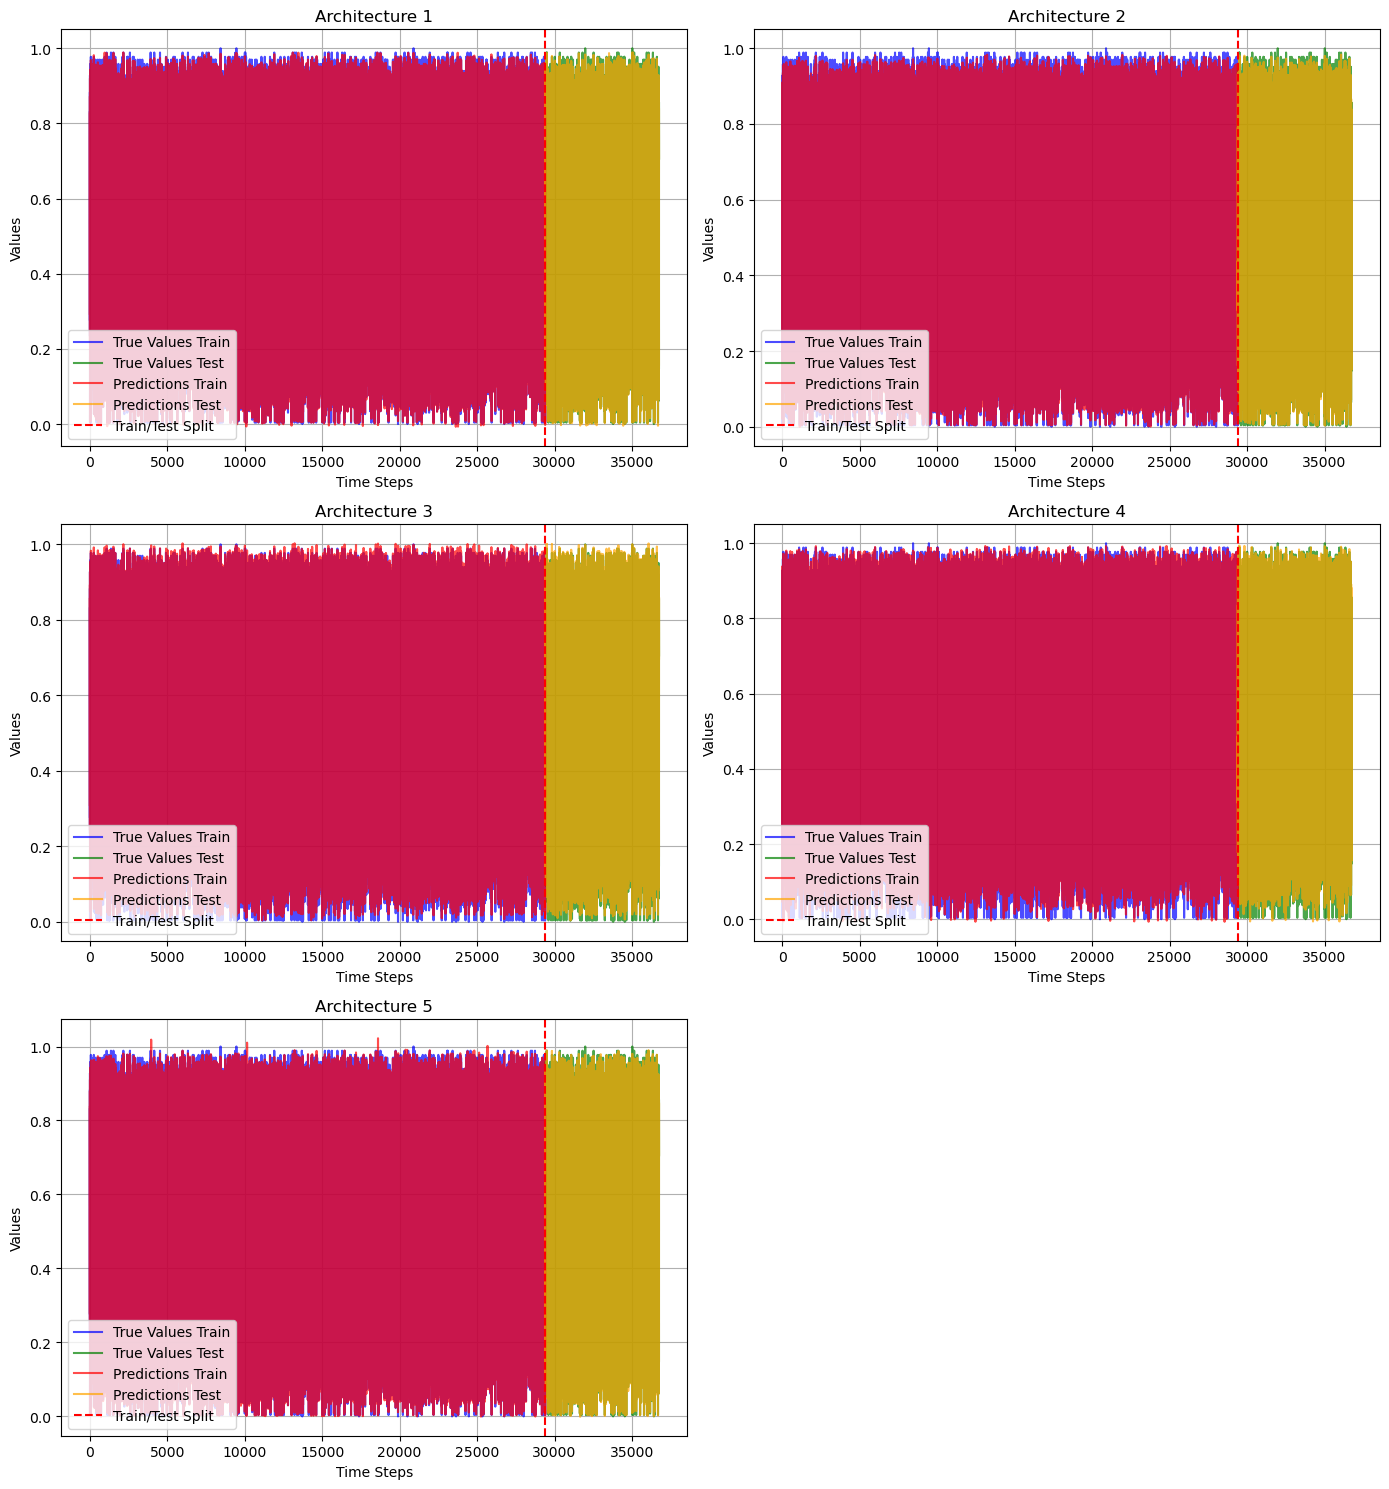

In [61]:
plot_predictions_vs_true_values(architectures_results, y_train, y_test)

In [95]:
display_architecture_comparison(top_architectures, architectures_results)

,Architecture,Estimated Loss,Real Loss,Error
0,Architecture_1,0.000443,0.000125,0.000318
1,Architecture_2,0.000443,0.000185,0.000258
2,Architecture_3,0.000443,0.000266,0.000177
3,Architecture_4,0.000443,0.001006,-0.000563
4,Architecture_5,0.000443,0.000105,0.000338


<div style="text-align:center;">  

# THANK YOU !

</div>